# Word Clouds
Word clouds are a beautiful, fun and useful way of representing and viewing text data. We’ve probably all seen one before. The basic concept is that of showing the most frequently appearing words in a piece of text and to scale these words proportionally to their frequency of appearance (e.g. a word appearing 500 times will have a higher font size and will be more obvious in the word cloud than a word appearing 100 times).

In [1]:
# !pip install wordcloud

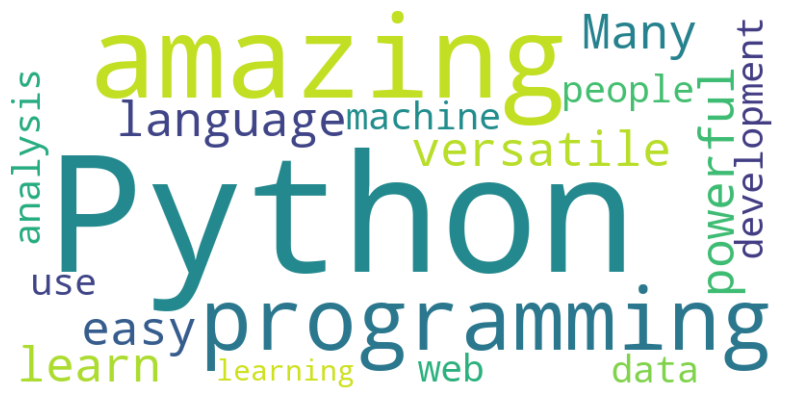

In [2]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Sample text
text = "Python is an amazing programming language. It is versatile, powerful, and easy to learn. Many people use Python for data analysis, web development, and machine learning."

# Create a set of stopwords
stopwords = set(STOPWORDS)

# Create a WordCloud object
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=50, width=800, height=400)

# Generate the word cloud from the text
wordcloud.generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Let's use a transparent .png image to give a specific shape to our word cloud.

In [3]:
import requests
import string

# URL of the book you want to download
book_url = 'https://www.gutenberg.org/cache/epub/11/pg11.txt'

# Send a GET request to the URL and download the text
response = requests.get(book_url)
alice_in_wonderland_text = response.text

# Uncomment this if you encounter weird characters
# Remove unwanted characters from the text 
allowed_chars = string.ascii_letters + string.digits + string.whitespace
alice_in_wonderland_text = ''.join(c for c in alice_in_wonderland_text if c in allowed_chars)

# Print the first 5000 characters of the book text
print(alice_in_wonderland_text[:80])

The Project Gutenberg eBook of Alices Adventures in Wonderland by Lewis Carroll


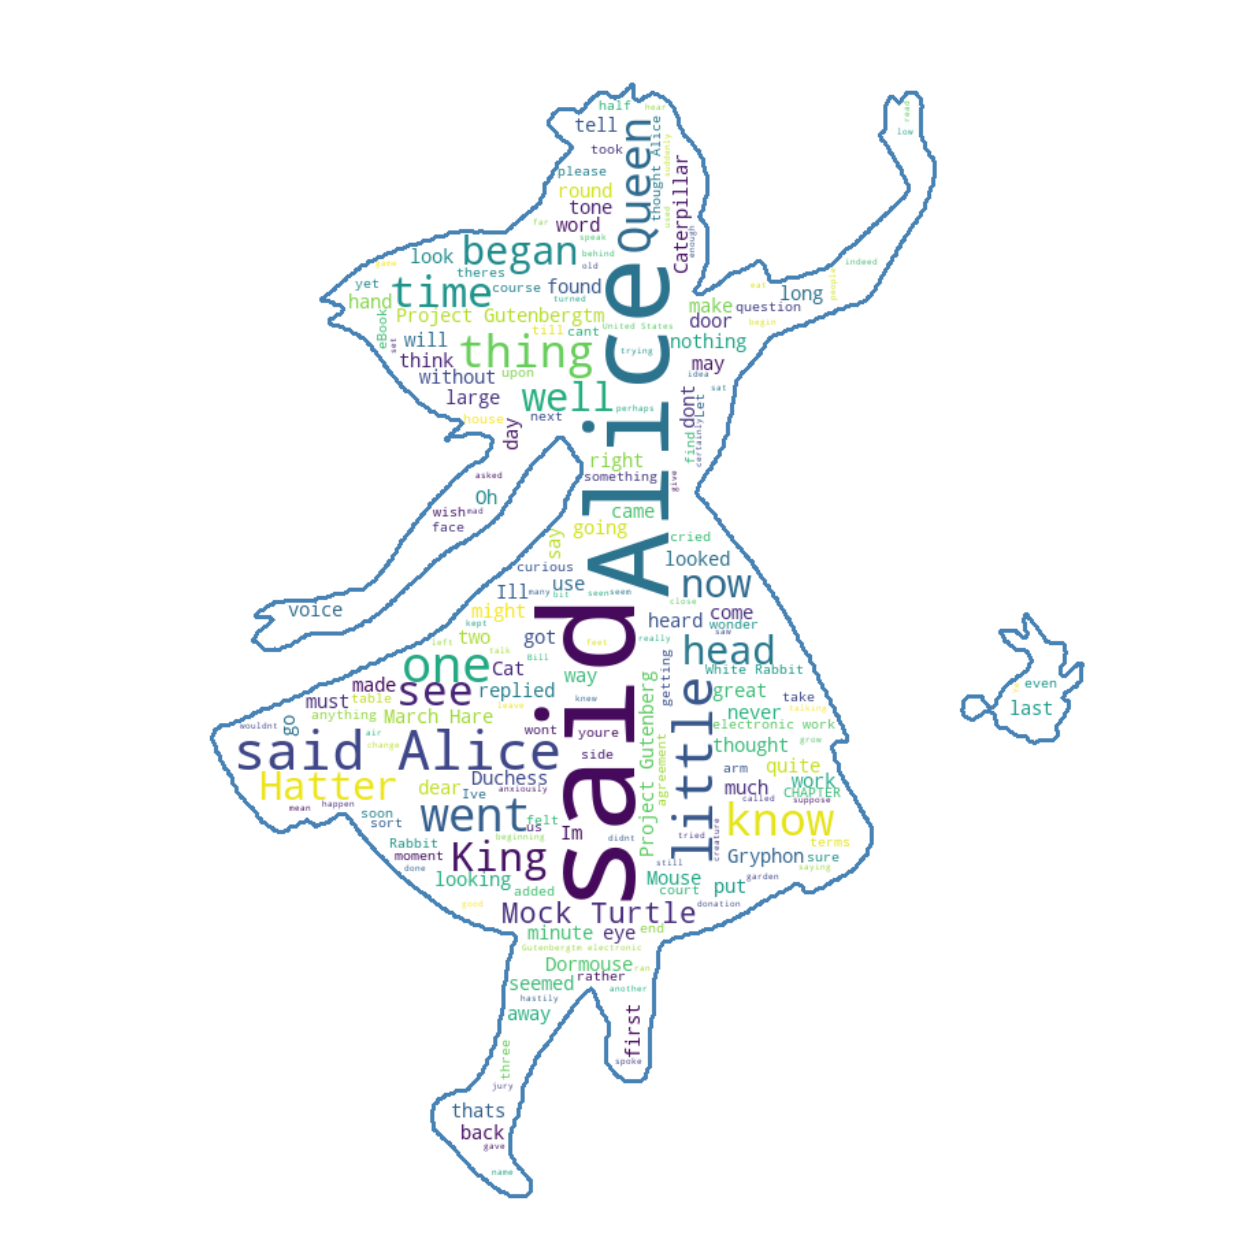

In [4]:
# We have the posibility of shaping the word cloud based on an image
import numpy as np
from PIL import Image
image_mask = np.array(Image.open("image_mask.png"))
wordcloud = WordCloud(background_color='white', mask=image_mask, width=2000, height=1800, contour_width=3, contour_color='steelblue').generate(alice_in_wonderland_text)
plt.figure(figsize = (16, 16), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


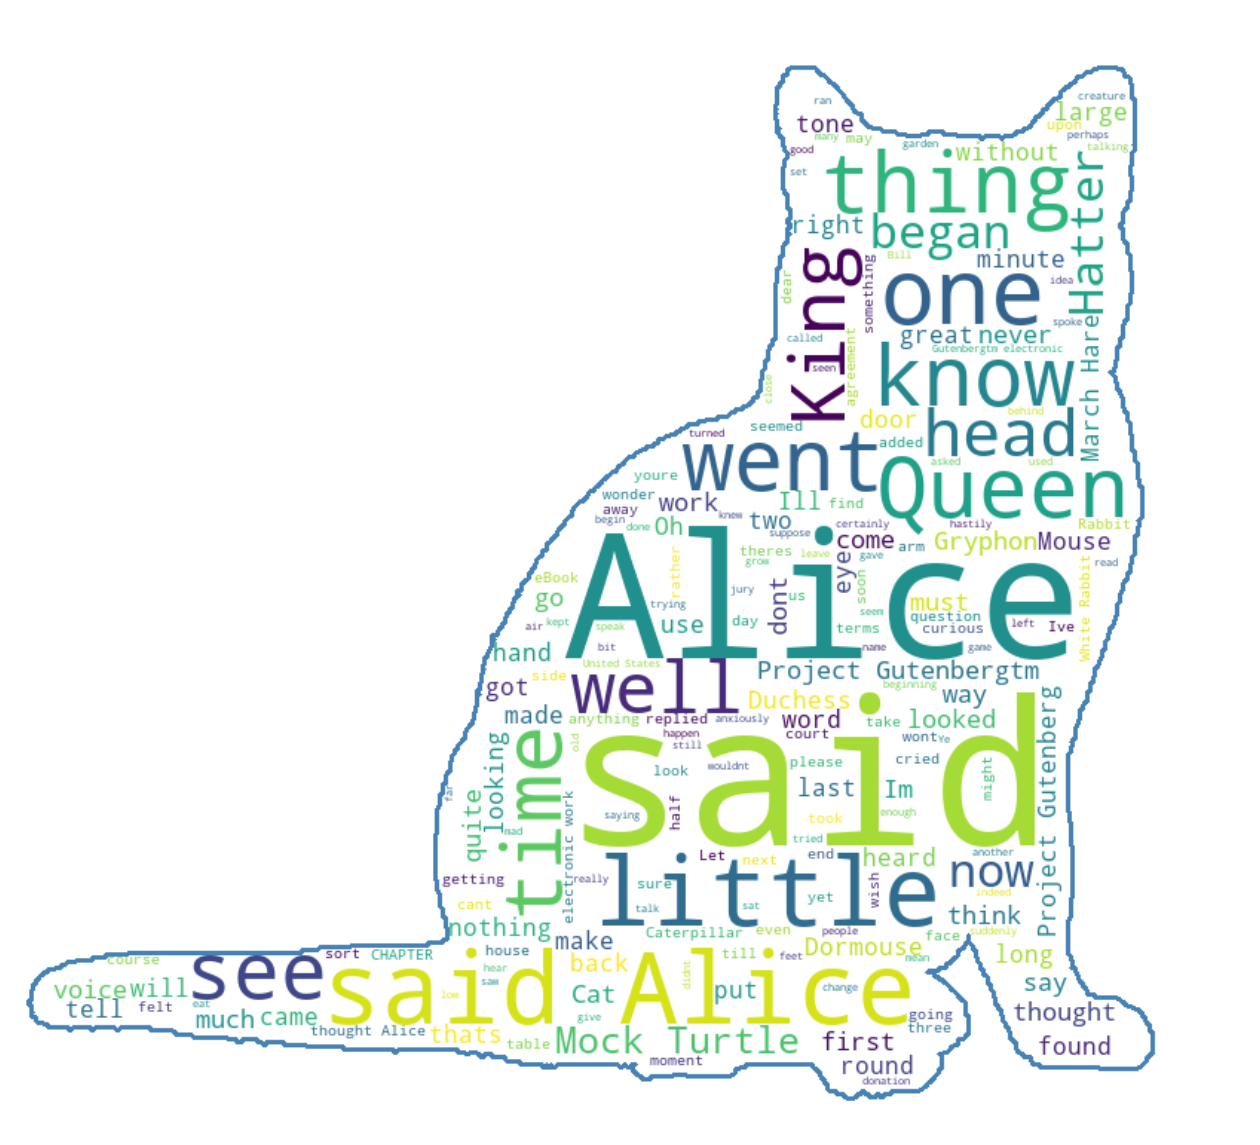

In [5]:
# We have to specify a transparent .png image to serve as a mask in order to get our shapes.
# The png image needs to have pixel values = 255 rather than 0 in order to work.

# Here's an example of how to do that
mask = np.array(Image.open("cat.png"))
mask[mask == 0] = 255

import numpy as np
from PIL import Image
wordcloud = WordCloud(background_color='white', mask=mask, width=1000, height=900, contour_width=3, contour_color='steelblue').generate(alice_in_wonderland_text)
plt.figure(figsize = (16, 16), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Exercise 4 - Visualize word clouds
1. Put together the text of all of the tweets coming from the first_100_en_tweets dataframe.
2. Draw a word cloud from (the merged text of) all the tweets in the dataframe.
3. Draw a word cloud from all the positive tweets in the dataframe.

    `Use colormap='Set2' as a parameter when creating the WordCloud() for ex. 4.3.`
4. Draw a word cloud from all the positive tweets in the dataframe using a custom png image of your own (different than the 2 example ones).

*Good to know: World clouds also have a generate_from_frequencies() method of generating the cloud. This expects a dictionary of form {'word_a' : 20, 'word_b' : 3, 'word_c' : 120, etc.} as input where words _a, _b and _c are the words and 20, 3, 120 are their respective occurrence frequency.
Dataframes can be transformed into dictionaries - e.g. .to_dict()*

In [25]:
import pandas as pd
from transformers import pipeline

sentiment_pipeline = pipeline("text-classification", model='cardiffnlp/twitter-roberta-base-sentiment')#, top_k=None)

tweets = pd.read_csv('chatgpt_tweets.csv')
tweets = tweets[tweets['Language']=='en'].sort_values(by=['LikeCount'],ascending=False).head(100)
tweets = tweets.reset_index(drop=True)
tweets.index+=1
tweets['Sentiment'] = tweets['Text'].apply(sentiment_pipeline).str[0]
tweets['Sentiment'] = tweets['Sentiment'].apply(lambda x: x['label'])
tweets=tweets.replace('LABEL_0', 'negative').replace('LABEL_1', 'neutral').replace('LABEL_2', 'positive')

,Datetime,Text,Username,ReplyCount,RetweetCount,LikeCount,Language,Sentiment
1,2023-01-22 14:08:45+00:00,ChatGPT passed a Wharton MBA exam. \n\nTime to...,GRDecter,1421,6815,56073,en,positive
2,2023-01-23 01:16:07+00:00,The fact that ChatGPT writes strange and medio...,mccormick_ted,68,1874,16856,en,negative
3,2023-01-22 16:17:51+00:00,Pretty absurd that chatGPT has passed the Unit...,noor_siddiqui_,496,2627,12557,en,negative
4,2023-01-24 02:47:36+00:00,ChatGPT has passed:\n\n- United States medical...,GRDecter,777,2082,12158,en,neutral
5,2023-01-23 14:16:19+00:00,JUST IN: ChatGPT creator OpenAI signs multi-ye...,WatcherGuru,490,2203,11520,en,neutral
...,...,...,...,...,...,...,...,...
96,2023-01-23 13:24:56+00:00,This Chat GPT trick blew me away🤯\n\nYouTubers...,Ed_FilmBooth,12,23,339,en,positive
97,2023-01-22 19:56:52+00:00,The more I see people talk about how great Cha...,MaxWinebach,21,12,334,en,negative
98,2023-01-23 08:44:15+00:00,Imagine what we could do with #ChatGPT in cric...,mukundabhinav,9,12,334,en,positive
99,2023-01-23 18:47:52+00:00,Elon's algos REALLY don't like me... maybe I c...,DarrenJBeattie,40,34,327,en,negative


In [23]:
tweets_text = ''.join(tweets['Text'].tolist())
print(tweets_text)

ChatGPT passed a Wharton MBA exam. 

Time to overhaul education.The fact that ChatGPT writes strange and mediocre undergraduate humanities papers but fantastic elite MBA exams suggests it may not have the same implications for every kind of education https://t.co/6MiaepzCDUPretty absurd that chatGPT has passed the United States Medical Licensing Examination (USMLE). 

Today, it takes 4 years of med school and 2+ years of clinical rotations to pass. It tests ambiguous scenarios &amp; closely-related differential diagnoses

https://t.co/oGdKXhEnUtChatGPT has passed:

- United States medical license exam

- The Bar Exam

- MBA operations exam 

Knowledge workers should be very worriedJUST IN: ChatGPT creator OpenAI signs multi-year, multi-billion investment deal with Microsoft $MSFT.ChatGPT, an artificial intelligence search tool, has passed the United States Medical Licensing Exam. https://t.co/sK639Ih6PRI think we haven't fully absorbed the fact that careful academic papers have found C

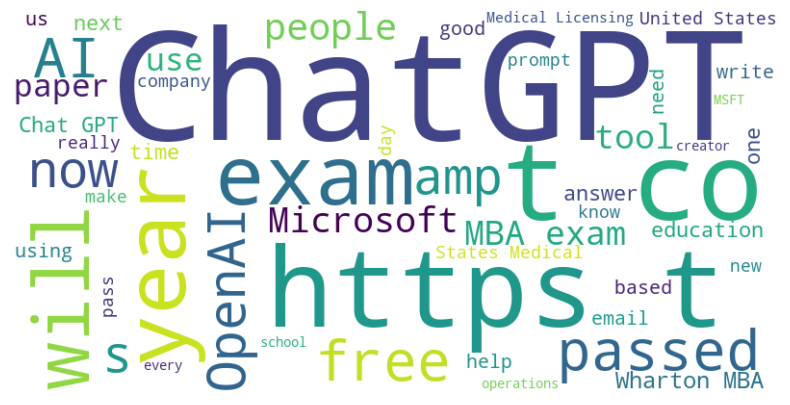

In [24]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=50, width=800, height=400)
wordcloud.generate(tweets_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

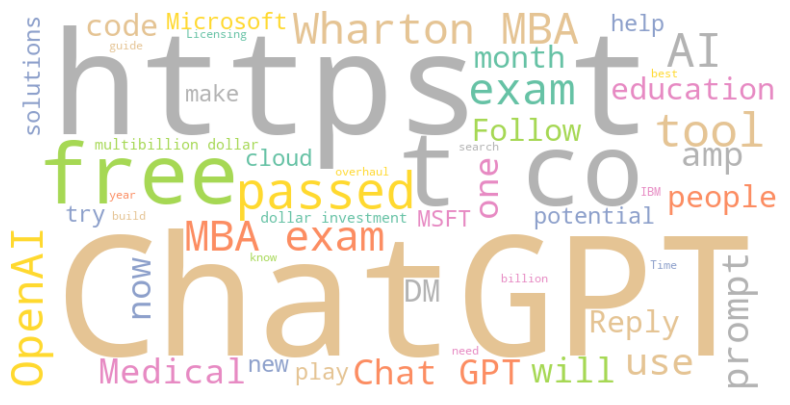

In [36]:
tweets_text_pos = ''.join(tweets[tweets['Sentiment']=='positive']['Text'].tolist())
wordcloud = WordCloud(stopwords=stopwords, colormap='Set2', background_color="white", max_words=50, width=800, height=400)
wordcloud.generate(tweets_text_pos)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

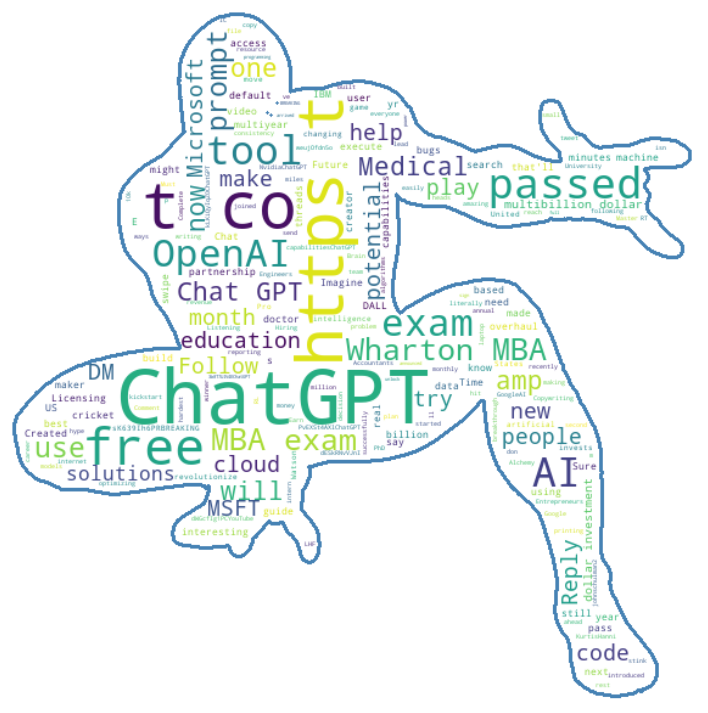

In [50]:
mask = np.array(Image.open("spiderman.png"))
#mask[mask == 0] = 255

wordcloud = WordCloud(background_color='white', mask=mask, contour_width=3, contour_color='steelblue').generate(tweets_text_pos)

plt.figure(figsize = (9, 9), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()